<a href="https://colab.research.google.com/github/Modassirnazar/OIBSIP_3/blob/main/Car_Price__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction**

**Importing Libraries**

In [164]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

**Load the Dataset**

In [165]:
# Load the dataset
df = pd.read_csv('/content/car data.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [167]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

**Checking for NULL values**

In [168]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [169]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [170]:
df.shape

(301, 9)

In [171]:
df.sample(4)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
131,Yamaha FZ 16,2015,0.75,0.82,18000,Petrol,Individual,Manual,0
230,verna,2013,6.15,9.40,45000,Diesel,Dealer,Manual,0
40,baleno,2016,5.85,7.87,24524,Petrol,Dealer,Automatic,0
222,i20,2014,6.00,7.60,77632,Diesel,Dealer,Manual,0


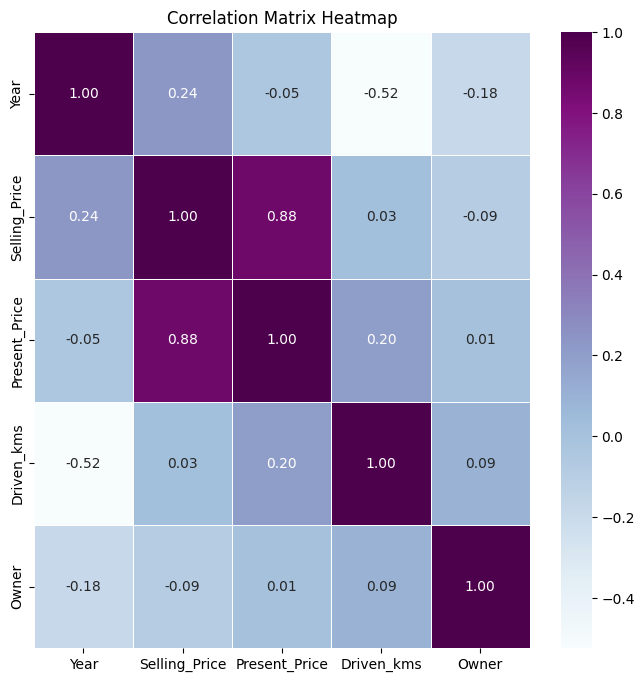

In [172]:
# Calculate the correlation matrix
numeric_columns =  df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms','Owner']]
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [173]:
#top_car
top_car = df['Car_Name'].value_counts().nlargest(10)

**Top 10 Companies with highest number of used cars for sale**

<ipython-input-174-0c8082dd914f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df.Car_Name, order=top_car.index, palette='viridis')


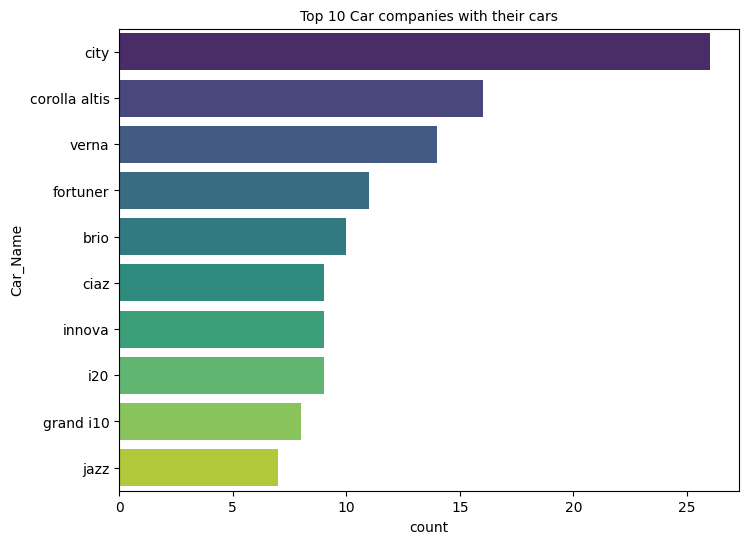

In [174]:
plt.figure(figsize = (8, 6))
sns.countplot(y = df.Car_Name, order=top_car.index, palette='viridis')
plt.title("Top 10 Car companies with their cars", fontsize = 10)
plt.show()

In [175]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

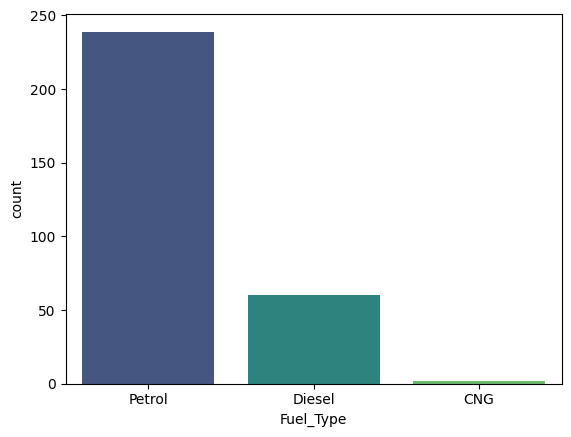

In [176]:
sns.countplot(x=df['Fuel_Type'],hue=df['Fuel_Type'], palette='viridis')

In [177]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

<Axes: xlabel='Selling_type', ylabel='count'>

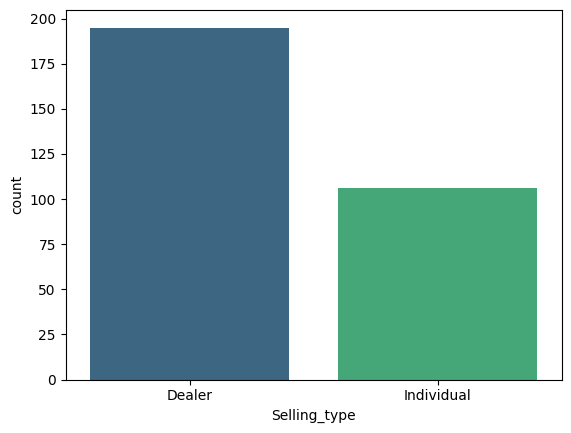

In [178]:
sns.countplot(x=df['Selling_type'],hue=df['Selling_type'], palette='viridis')

In [179]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

*We can see that most of the cars are 'Manual'*

In [180]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

<Axes: xlabel='Selling_Price'>

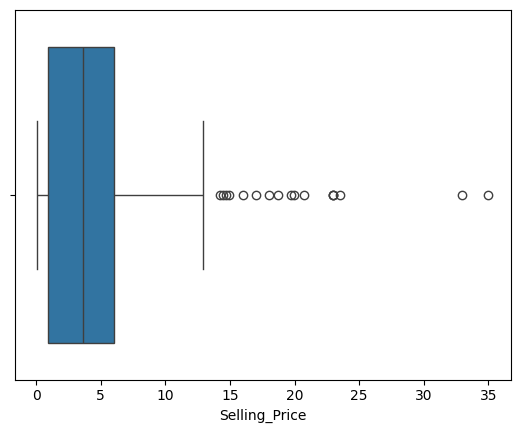

In [181]:
sns.boxplot(x=df['Selling_Price'])

In [184]:
percentile_75 = np.percentile(df['Selling_Price'],75)

In [185]:
sum(df['Selling_Price']>percentile_75)

74

*There are 74 cars out of 301 having Selling_Price > 75th_Percentile*

<Axes: xlabel='Selling_Price', ylabel='Count'>

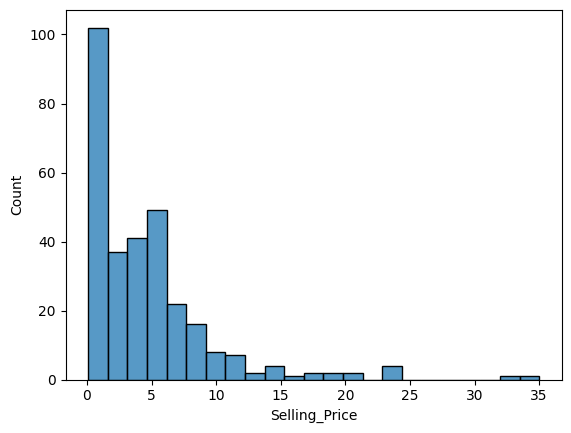

In [183]:
sns.histplot(df['Selling_Price'])

<ipython-input-182-90ef0c4da9b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Year'],palette = 'viridis')


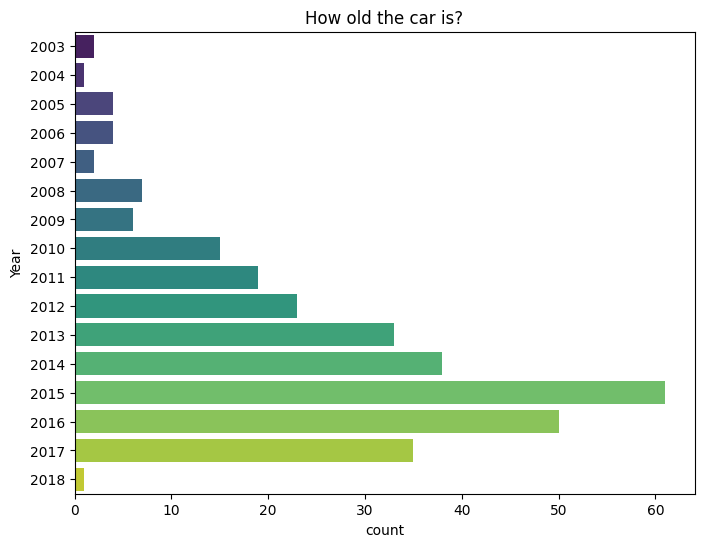

In [182]:
plt.figure(figsize = (8,6))
sns.countplot(y=df['Year'],palette = 'viridis')
plt.title('How old the car is?')
plt.show()

*Most of the car models are of 2015*

<Axes: xlabel='Selling_Price', ylabel='Driven_kms'>

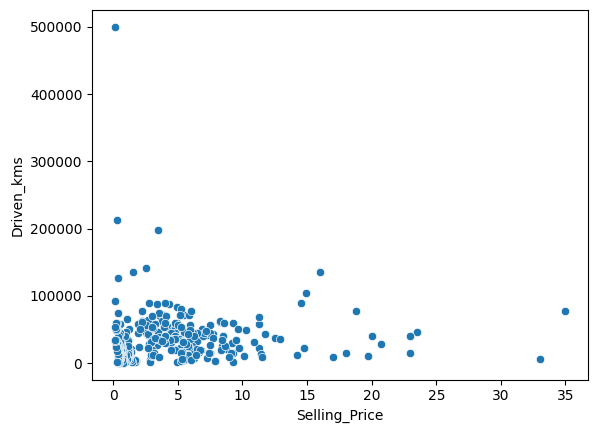

In [186]:
sns.scatterplot(x=df['Selling_Price'],y=df['Driven_kms'])

**Non_numeric Columns**

In [187]:
# Extracting non-numerical columns
df.select_dtypes(include=['object']).columns


Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

**Label Encoding**

In [188]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the categorical columns to numerical using LabelEncoder
df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])


In [189]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


**Splitting into training and Testing data**

In [190]:
# Select features (X) and target variable (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


**Scaling the data_points to a common range**

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Building**
*  Linear Regression
*  Decision Tree Regressor
*  Random Forest Regressor
*  XGBoost Regressor
*  MLP Regressor





In [192]:

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)

# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test_scaled)

# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_reg.predict(X_test_scaled)

# XGBoost Regressor
xgboost_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                               max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)
xgboost_reg.fit(X_train_scaled, y_train)
xgboost_predictions = xgboost_reg.predict(X_test_scaled)

# MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)
mlp_predictions = mlp_reg.predict(X_test_scaled)

**Model Evaluation**
* Mean_Squared_Error
* R_Squared_Error

In [194]:


# Evaluate the models
models = {'Linear Regression': linear_reg, 'Decision Tree Regressor': decision_tree_reg,
          'Random Forest Regressor': random_forest_reg, 'XGBoost Regressor': xgboost_reg,
          'MLP Regressor': mlp_reg}

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')




Linear Regression - Mean Squared Error: 6.507819977947056, R-squared: 0.7688828477496812
Decision Tree Regressor - Mean Squared Error: 2.2728442622950817, R-squared: 0.9192827559474342
Random Forest Regressor - Mean Squared Error: 3.4803063719672105, R-squared: 0.8764012372233072
XGBoost Regressor - Mean Squared Error: 7.163230503468686, R-squared: 0.7456067561050521
MLP Regressor - Mean Squared Error: 1.486528994040077, R-squared: 0.9472077671164387


**The best Model is MLP Regressor having least mse (1.49) and highest r2_score (0.95)**

<ipython-input-196-3f4029ee130f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=performance_df, palette='viridis')
<ipython-input-196-3f4029ee130f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R-squared', y='Model', data=performance_df, palette='viridis')


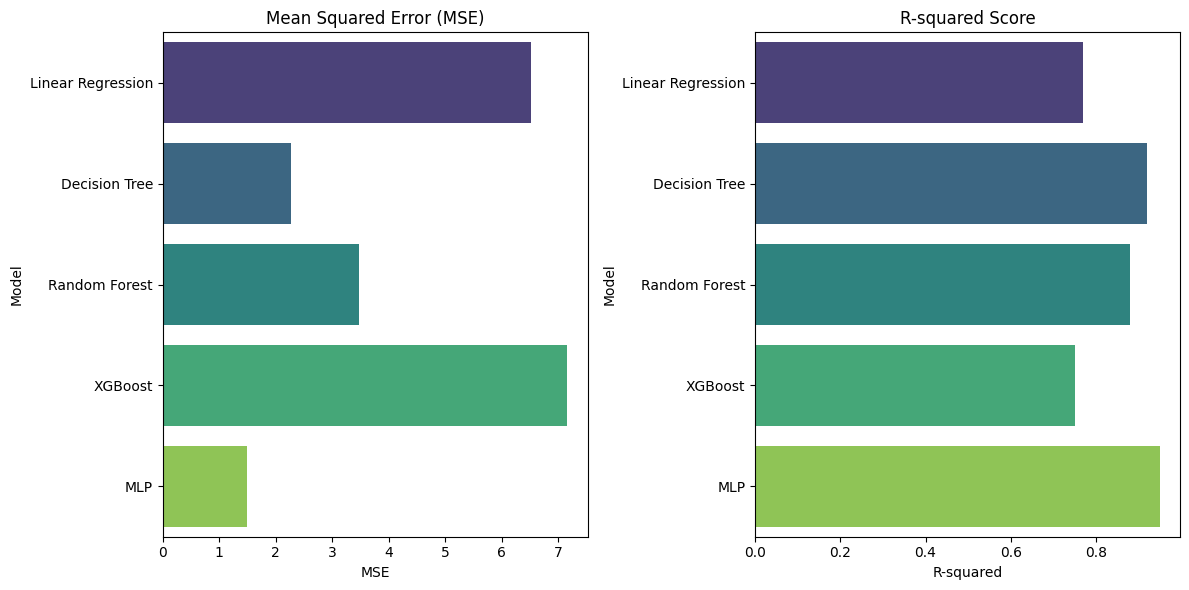

In [196]:

# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'MLP']

# Corresponding MSE and R² scores
mse_scores = [6.51, 2.27, 3.48, 7.16, 1.49]
r2_scores = [0.77, 0.92, 0.88, 0.75, 0.95]

# Create a DataFrame for easy plotting
performance_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'R-squared': r2_scores})

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x='MSE', y='Model', data=performance_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('MSE')

# Bar plot for R-squared
plt.subplot(1, 2, 2)
sns.barplot(x='R-squared', y='Model', data=performance_df, palette='viridis')
plt.title('R-squared Score')
plt.xlabel('R-squared')

plt.tight_layout()
plt.show()
